# How to Plot a Histogram

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
from util import get_data
from util import plot_data

In [4]:
def compute_daily_returns(df):
    daily_returns = (df / df.shift(1)) - 1
    daily_returns.iloc[0, :] = 0 # Replace NaN with 0
    return daily_returns

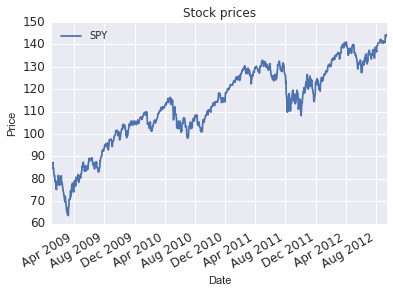

In [7]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)
plot_data(df)

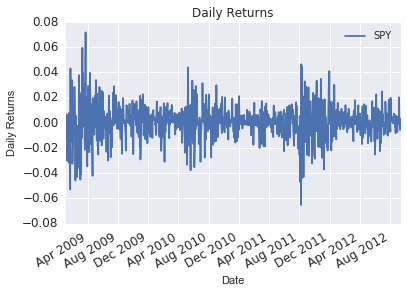

In [8]:
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title='Daily Returns', ylabel='Daily Returns')

Plot a histogram:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1148ef990>]], dtype=object)

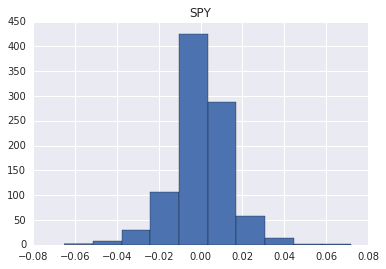

In [12]:
daily_returns.hist()

The default number of bins is 10.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112a908d0>]], dtype=object)

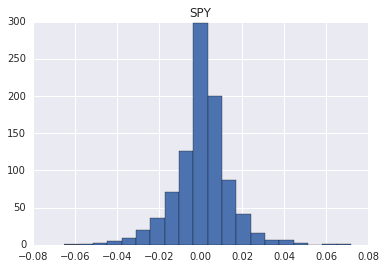

In [13]:
daily_returns.hist(bins=20)

# Computing Histogram Statistics

Get the mean and standard deviations:

In [17]:
mean = daily_returns['SPY'].mean()
std = daily_returns['SPY'].std()

print 'Mean: %s' % mean
print 'Std: %s' % std

Mean: 0.000635578332225
Std: 0.0133704908994


Add the mean and standard deviation lines to the plot:

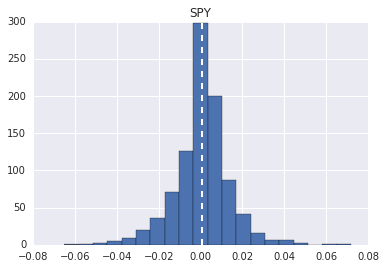

In [19]:
p = daily_returns.hist(bins=20)
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.show()

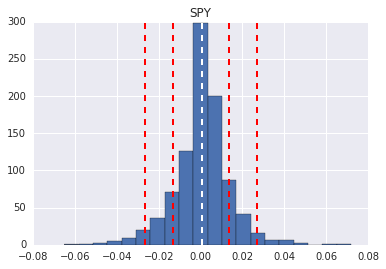

In [25]:
p = daily_returns.hist(bins=20)
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(+std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(+std*2, color='r', linestyle='dashed', linewidth=2) # 2 sigma
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std*2, color='r', linestyle='dashed', linewidth=2) # 2 sigma
plt.show()

Compute kurtosis: (shape of the distribution)

In [27]:
daily_returns.kurtosis()

SPY    3.220278
dtype: float64

# Plot Two Histograms Together

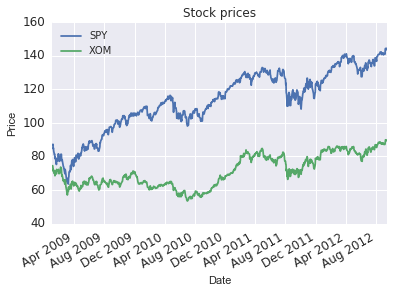

In [28]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY', 'XOM']
df = get_data(symbols, dates)
plot_data(df)

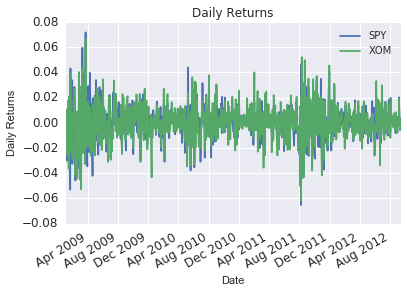

In [29]:
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title='Daily Returns', ylabel='Daily Returns')

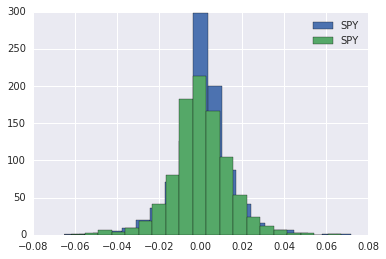

In [31]:
daily_returns['SPY'].hist(bins=20, label='SPY')
daily_returns['XOM'].hist(bins=20, label='SPY')
plt.legend(loc='upper right')
plt.show()

# Scatterplots in Python

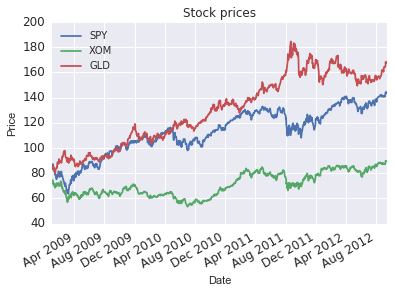

In [32]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY', 'XOM', 'GLD']
df = get_data(symbols, dates)
plot_data(df)

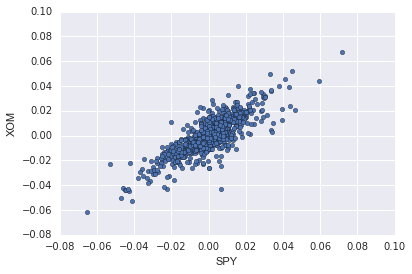

In [34]:
daily_returns = compute_daily_returns(df)
daily_returns.plot(kind='scatter', x='SPY', y='XOM')
plt.show()

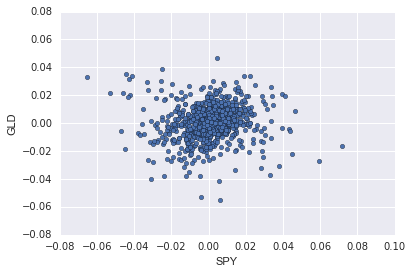

In [35]:
daily_returns.plot(kind='scatter', x='SPY', y='GLD')
plt.show()

Let's fit a line to the plot:

In [37]:
import numpy as np

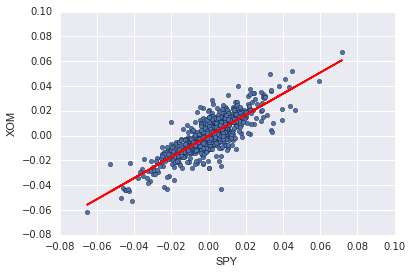

In [40]:
daily_returns = compute_daily_returns(df)
daily_returns.plot(kind='scatter', x='SPY', y='XOM')
beta_xom, alpha_xom = np.polyfit(daily_returns['SPY'], daily_returns['XOM'], 1)
# This is the y = mx + b equation
plt.plot(daily_returns['SPY'], beta_xom * daily_returns['SPY'] + alpha_xom, '-', color='r')
plt.show()

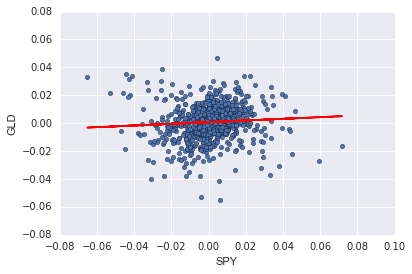

In [41]:
daily_returns = compute_daily_returns(df)
daily_returns.plot(kind='scatter', x='SPY', y='GLD')
beta_gld, alpha_gld = np.polyfit(daily_returns['SPY'], daily_returns['GLD'], 1)
# This is the y = mx + b equation
plt.plot(daily_returns['SPY'], beta_gld * daily_returns['SPY'] + alpha_gld, '-', color='r')
plt.show()

# Calculate the correlation coeffecient

In [42]:
print daily_returns.corr(method='pearson')

          SPY       XOM       GLD
SPY  1.000000  0.820241  0.067324
XOM  0.820241  1.000000  0.069687
GLD  0.067324  0.069687  1.000000
